# Step 1: Imports

In [25]:
# this are imports nothing special
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    f1_score,
)
from xgboost import XGBClassifier  # pip3 install xgboost  and  brew install libomp
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")


# Step 2: Loading and Inspecting the Data

In [26]:
# filename = '../data/Crimes_-_2015_20260102.csv' # this is mock until andria gives me cleaned one
filename='../data/crime_data_clean.csv'  # this is cleaned data from andria
df = pd.read_csv(filename)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Hour,Day_of_Week,Month,Is_Weekend,Season,Area_Hour_Crime_Count,Area_Season_Crime_Count
0,10365064,HZ100370,2015-12-31 23:59:00,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,41.757367,-87.642993,POINT (-87.642992854 41.757366519),23,3,12,0,Winter,351,1416
1,10364662,HZ100006,2015-12-31 23:55:00,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,41.751270,-87.585822,POINT (-87.585822373 41.751270452),23,3,12,0,Winter,53,303
2,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,42.016804,-87.690709,POINT (-87.690708662 42.016804165),23,3,12,0,Winter,131,728
3,10364683,HZ100002,2015-12-31 23:50:00,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,41.949837,-87.658635,POINT (-87.658635101 41.949837364),23,3,12,0,Winter,255,1084
4,10366580,HZ102701,2015-12-31 23:45:00,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,41.910470,-87.751597,POINT (-87.751597381 41.910469677),23,3,12,0,Winter,767,3708


# Step 3: Lets see what we are working with

In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256553 entries, 0 to 256552
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       256553 non-null  int64  
 1   Case Number              256553 non-null  object 
 2   Date                     256553 non-null  object 
 3   Block                    256553 non-null  object 
 4   IUCR                     256553 non-null  object 
 5   Primary Type             256553 non-null  object 
 6   Description              256553 non-null  object 
 7   Location Description     256553 non-null  object 
 8   Arrest                   256553 non-null  bool   
 9   Domestic                 256553 non-null  bool   
 10  Beat                     256553 non-null  int64  
 11  District                 256553 non-null  int64  
 12  Ward                     256553 non-null  float64
 13  Community Area           256553 non-null  float64
 14  FBI 

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Day_of_Week,Month,Is_Weekend,Area_Hour_Crime_Count,Area_Season_Crime_Count
count,2.565530e+05,256553.000000,256553.000000,256553.000000,256553.000000,2.565530e+05,2.565530e+05,256553.0,256553.000000,256553.000000,256553.000000,256553.00000,256553.000000,256553.000000,256553.00000,256553.000000
mean,1.012477e+07,1141.814183,11.190842,22.725468,37.359255,1.164751e+06,1.885320e+06,2015.0,41.840913,-87.670959,13.301883,3.02090,6.593998,0.287356,276.76461,1460.945875
std,4.647760e+05,692.548665,6.920132,13.769855,21.298108,1.593687e+04,3.109869e+04,0.0,0.085528,0.057990,6.595156,1.99425,3.340280,0.452530,205.42855,977.664621
min,2.171400e+04,111.000000,1.000000,1.000000,1.000000,1.116632e+06,1.813897e+06,2015.0,41.644590,-87.846497,0.000000,0.00000,1.000000,0.000000,4.00000,47.000000
25%,1.003049e+07,612.000000,6.000000,10.000000,23.000000,1.152583e+06,1.858493e+06,2015.0,41.766957,-87.715120,9.000000,1.00000,4.000000,0.000000,121.00000,728.000000
50%,1.014403e+07,1022.000000,10.000000,23.000000,32.000000,1.166169e+06,1.891042e+06,2015.0,41.856728,-87.665784,14.000000,3.00000,7.000000,0.000000,236.00000,1374.000000
75%,1.025729e+07,1711.000000,17.000000,34.000000,56.000000,1.176408e+06,1.908204e+06,2015.0,41.903871,-87.627928,19.000000,5.00000,9.000000,1.000000,378.00000,1981.000000
max,1.359986e+07,2535.000000,31.000000,50.000000,77.000000,1.205111e+06,1.951523e+06,2015.0,42.022575,-87.524615,23.000000,6.00000,12.000000,1.000000,1045.00000,4718.000000


# Step 4: Lets start, separate features and target and split into train/test

In [28]:
# this is before we got cleaned data from andria
# target = 'Arrest' # assuming we are predicting arrest
# X = df.select_dtypes(include=['number']).drop(columns=[target], errors='ignore') # we only use numeric columns because ML models can't read text directly
# y = df[target]

# # splitting into train test. 80% train 20% test since we know this is recommended
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# after we got cleaned data from andria
# here we define our features and target variable
# documentation says we shoould use relevant features only
features = ['Primary Type', 'District', 'Ward', 'Community Area', 'Domestic']
target = 'Arrest'


df_sample = df.sample(n=100000, random_state=42) if len(df) > 100000 else df
X = df_sample[features].copy()
y = df_sample[target]

for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# converting categorical variables to dummy variables meaning one-hot encoding(categorial text to numeric)
# this makes kernel crash
# X = pd.get_dummies(X, drop_first=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model 1: Logistic Regression

In [29]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log_reg))


              precision    recall  f1-score   support

       False       0.80      0.48      0.60     14691
        True       0.32      0.67      0.43      5309

    accuracy                           0.53     20000
   macro avg       0.56      0.57      0.52     20000
weighted avg       0.67      0.53      0.56     20000



# Model 2: Random Forest

In [30]:
rf= RandomForestClassifier(n_estimators=100, 
                                  max_depth=10, 
                                  class_weight='balanced', 
                                  random_state=42, 
                                  n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.86      0.91      0.89     14691
        True       0.71      0.60      0.65      5309

    accuracy                           0.83     20000
   macro avg       0.78      0.75      0.77     20000
weighted avg       0.82      0.83      0.82     20000



# Model 3: XGB Classifier

In [31]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=3, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

       False       0.88      0.86      0.87     14691
        True       0.63      0.67      0.65      5309

    accuracy                           0.81     20000
   macro avg       0.75      0.76      0.76     20000
weighted avg       0.81      0.81      0.81     20000



# Comparison

In [32]:
# summarizing model performances
model_data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    "F1-Score (Arrest)": [f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb)]
}

comparison_df = pd.DataFrame(model_data)
print('Final Model Comparison Table:')
print(comparison_df)

Final Model Comparison Table:
                 Model  Accuracy  F1-Score (Arrest)
0  Logistic Regression   0.53085           0.430609
1        Random Forest   0.82755           0.647882
2              XGBoost   0.80835           0.649858


# Visualization

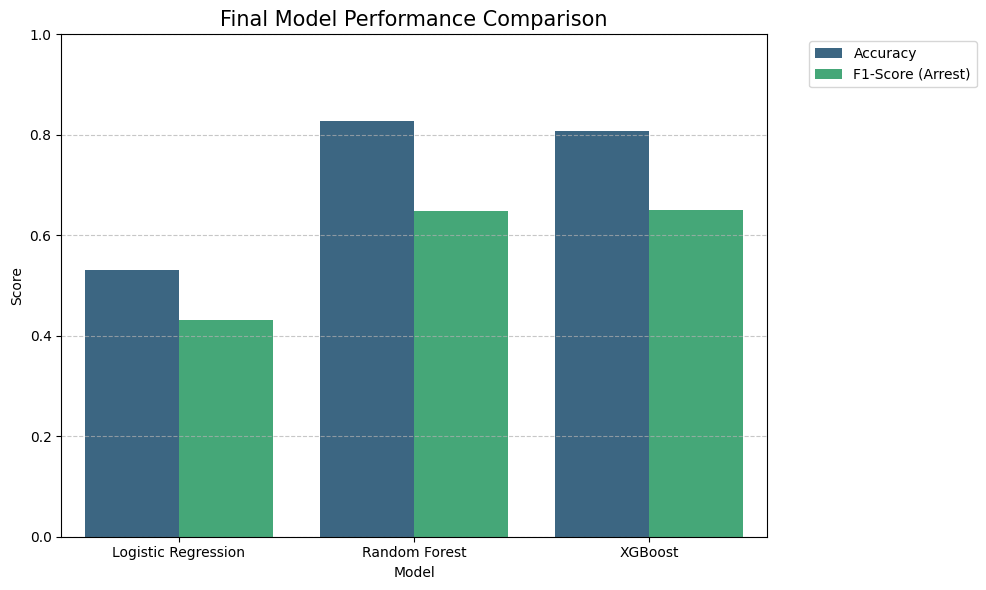

In [33]:
# here we visualize model performances
# meaning we compare how well each model did
plt.figure(figsize=(10, 6))
df_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score') # this is summarizing model performances for plotting
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('Final Model Performance Comparison', fontsize=15)
plt.ylim(0, 1.0)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Confusion Matrix For Random Forest (Best Model)

<Figure size 800x600 with 0 Axes>

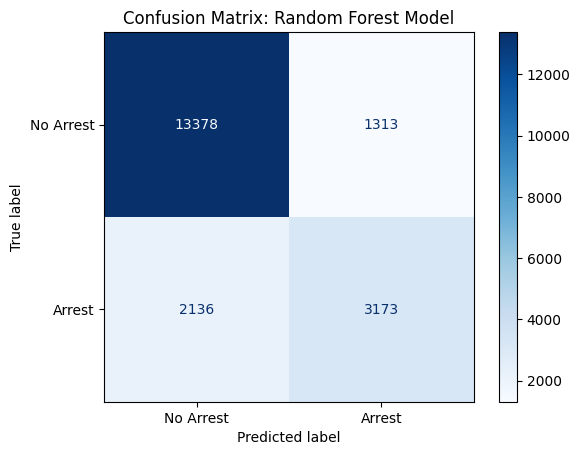

In [34]:
# here we do confusion matrix for random forest model
# meaning we visualize how well our random forest model did
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=['No Arrest', 'Arrest'], cmap='Blues')
plt.title('Confusion Matrix: Random Forest Model')
plt.show()

# Feature Importance

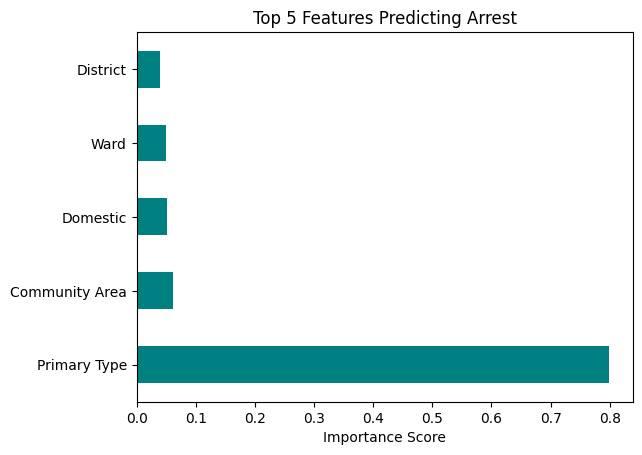

In [35]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh', color='teal')
plt.title('Top 5 Features Predicting Arrest')
plt.xlabel('Importance Score')
plt.show()

# Correlation Analysis

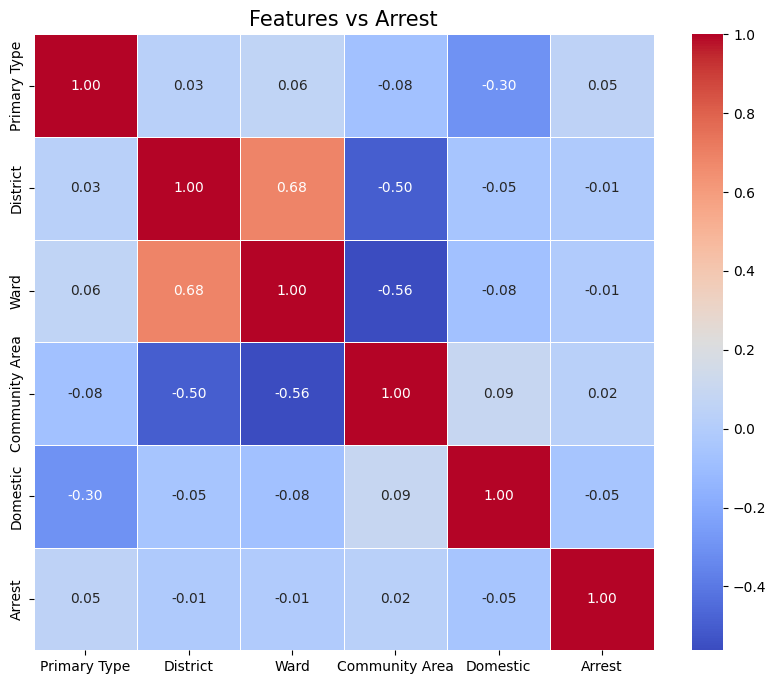

Arrest            1.000000
Primary Type      0.048616
Community Area    0.024953
Ward             -0.007817
District         -0.014654
Domestic         -0.052428
Name: Arrest, dtype: float64


In [36]:
# here we analyze feature correlations with the target variable
# meaning how each feature relates to the target variable 'Arrest'
corr_matrix = X.join(y).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Features vs Arrest', fontsize=15)
plt.show()
print(corr_matrix['Arrest'].sort_values(ascending=False))